In [2]:
import os
path = r'C:\Users\nadda\Desktop\KU\01204314-65-Statistics-for-Computer-Engineering-Applications\week10'
data_path = os.path.join(path, "data")
processed_data_path = os.path.join(path, "processed_data")
os.chdir(path)
os.getcwd()

'C:\\Users\\nadda\\Desktop\\KU\\01204314-65-Statistics-for-Computer-Engineering-Applications\\week10'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from pandas.plotting import scatter_matrix

In [4]:
df_regions = pd.read_excel(os.path.join(data_path, "countries_regions.xlsx"))
df_regions.reset_index(inplace=True)
df_regions.rename(columns={"CountryName": "Country"}, inplace=True)

df_gdp = pd.read_csv(os.path.join(processed_data_path, "gdp.csv"))

df_electricity = pd.read_csv(os.path.join(processed_data_path, "electricity.csv"))
df_internet = pd.read_csv(os.path.join(processed_data_path, "internet.csv"))
df_hospital = pd.read_csv(os.path.join(processed_data_path, "hospital.csv"))

df_life_expectancy = pd.read_csv(os.path.join(processed_data_path, "life_expectancy.csv"))
df_pop_working_age = pd.read_csv(os.path.join(processed_data_path, "pop_working_age.csv"))

In [5]:
def wide_to_long_format(df, valuename):
    return df.melt(id_vars=["Year"], var_name="Country", value_name=valuename)

def merge_with_regions(df):
    return df.merge(df_regions, on="Country", how="left")

def rolling_avg(df,valuename):
    df = wide_to_long_format(df, valuename)
    df = merge_with_regions(df)
    df = df.groupby(["Region", "Year"])[valuename].mean().reset_index()
    df["Rolling_Avg"] = df.groupby("Region")[valuename].transform(lambda x: x.rolling(5, min_periods=1).mean())
    return df

In [6]:
df_hospital.head(20)

,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Viet Nam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
0,2001,0.39,3.17,1.760000,3.605000,2.520000,1.690000,2.600000,2.144286,5.16,...,2.144286,5.55,3.100000,0.800000,1.41,2.886923,2.225000,0.590000,1.690000,1.690000
1,2002,0.39,3.10,1.750000,3.880000,3.460000,1.784286,2.300000,1.857500,4.50,...,1.857500,5.75,3.880000,1.857500,1.42,3.036667,2.221333,0.590000,1.784286,1.784286
2,2003,0.39,3.08,1.780000,2.977500,3.150000,1.952667,2.500000,1.490000,4.61,...,1.900000,5.66,3.700000,0.900000,1.44,3.067368,2.224667,0.590000,1.952667,1.952667
3,2004,0.39,3.07,1.810000,2.700000,2.680000,1.759524,2.400000,1.565714,4.65,...,1.565714,5.45,2.700000,1.565714,1.51,2.990000,2.186000,0.590000,2.000000,1.759524
4,2005,0.42,3.06,1.458462,2.460000,2.580000,0.800000,2.400000,4.000000,4.71,...,1.040000,5.36,4.100000,2.008750,1.53,2.676190,2.090000,0.610000,1.458462,1.458462
5,2006,0.42,3.11,1.720000,3.767500,2.570000,1.638529,2.400000,1.764444,4.72,...,0.990000,5.33,3.767500,1.764444,1.57,2.361333,2.109333,0.660000,1.638529,3.000000
6,2007,0.42,3.09,1.658889,2.860000,2.750000,1.658889,2.000000,1.597273,4.37,...,0.980000,5.08,2.860000,1.300000,1.68,2.030500,1.998000,0.640000,1.658889,1.658889
7,2008,0.42,3.08,1.750000,2.460000,2.810000,1.526190,1.700000,1.547143,4.14,...,0.950000,4.96,1.680000,1.547143,1.77,2.452778,1.973333,0.630000,1.900000,1.526190
8,2009,0.42,3.00,1.750000,2.960000,2.500000,1.522917,2.200000,1.662000,4.07,...,1.100000,4.96,2.960000,1.100000,1.90,2.378000,1.930667,0.650000,1.522917,1.880000
9,2010,0.43,2.99,1.720000,3.058750,6.123571,1.571250,2.200000,4.500000,4.13,...,2.580000,4.88,3.058750,2.117000,2.02,2.261500,1.926667,0.650000,2.000000,1.850000


In [7]:
'''df_inflation = 
df_debt = 
df_tax = 
df_expense = 
df_gdp = 

df_electricity = 
df_internet = 
df_hospital = 

df_life_expectancy = 
df_pop_65_up = 
df_pop_working_age = 
df_total_population = 
'''
'''
df_inflation = (df_inflation,"Inflation")
df_debt = (df_debt,"Debt")
df_tax = (df_tax,"Tax")
df_expense = (df_expense,"Expense")
df_gdp = (df_gdp,"GDP")

df_electricity = (df_electricity,"Electricity_Access")
df_internet = (df_internet,"Broadband_Subscriptions")
df_hospital = (df_hospital,"Hospital_Beds")

df_life_expectancy = (df_life_expectancy,"Life_Expectancy")
df_pop_65_up = (df_pop_65_up,"Elderly_Pop")
df_pop_working_age = (df_pop_working_age,"Working_Age_Pop")
df_total_population = (df_total_population,"Total_Pop")
'''
'''
(df_inflation,"Inflation")
(df_debt,"Debt")
(df_tax,"Tax")
(df_expense,"Expense")
(df_gdp,"GDP")

(df_electricity,"Electricity_Access")
(df_internet,"Broadband_Subscriptions")
(df_hospital,"Hospital_Beds")

(df_life_expectancy,"Life_Expectancy")
(df_pop_65_up,"Elderly_Pop")
(df_pop_working_age,"Working_Age_Pop")
(df_total_population,"Total_Pop")
'''

'\n(df_inflation,"Inflation")\n(df_debt,"Debt")\n(df_tax,"Tax")\n(df_expense,"Expense")\n(df_gdp,"GDP")\n\n(df_electricity,"Electricity_Access")\n(df_internet,"Broadband_Subscriptions")\n(df_hospital,"Hospital_Beds")\n\n(df_life_expectancy,"Life_Expectancy")\n(df_pop_65_up,"Elderly_Pop")\n(df_pop_working_age,"Working_Age_Pop")\n(df_total_population,"Total_Pop")\n'

In [8]:

df_gdp = rolling_avg(df_gdp,"GDP")

df_electricity = rolling_avg(df_electricity,"Electricity_Access")
df_internet = rolling_avg(df_internet,"Broadband_Subscriptions")
df_hospital = rolling_avg(df_hospital,"Hospital_Beds")

df_life_expectancy = rolling_avg(df_life_expectancy,"Life_Expectancy")
df_pop_working_age = rolling_avg(df_pop_working_age,"Working_Age_Pop")

In [9]:
def show_trend(df,Title):
    for region in df["Region"].dropna().unique():
        region_data = df[df["Region"] == region]
        plt.plot(region_data["Year"], region_data["Rolling_Avg"], label=region)
    plt.title("5-Year Rolling Average of Region's " + Title)
    plt.xlabel("Year")
    plt.ylabel(Title)
    plt.legend(fontsize=7, loc='best', ncol=2)

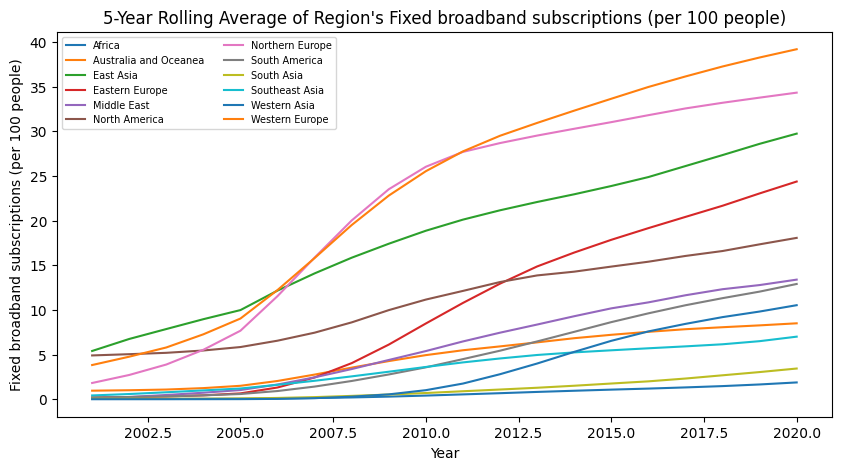

In [ ]:
# after remove outlier

plt.figure(figsize=(10, 5))

#show_trend(df_gdp,"GDP (current US$)")

#show_trend(df_electricity,"Access to electricity (% of population)")
show_trend(df_internet,"Fixed broadband subscriptions (per 100 people)")
#show_trend(df_hospital,"Hospital beds (per 1,000 people)")

#show_trend(df_life_expectancy,"Life expectancy at birth, total (years)")
#show_trend(df_pop_working_age,"Population ages 15-64 (% of total population)")

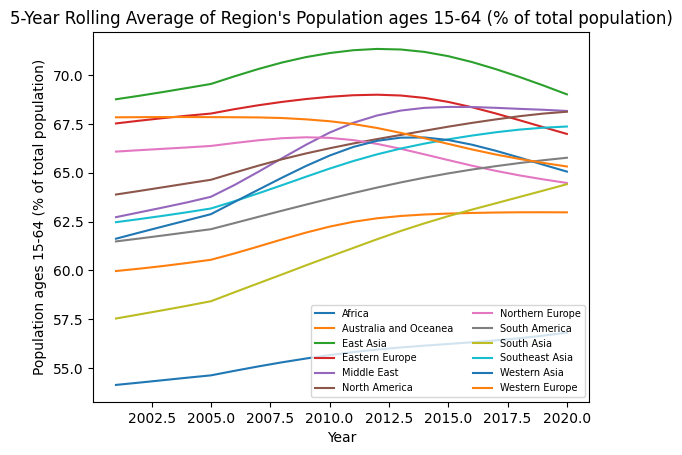

In [11]:
show_trend(df_pop_working_age,"Population ages 15-64 (% of total population)")

In [96]:
df_hospital.head(20)

,Region,Year,Hospital_Beds,Rolling_Avg
0,Africa,2001,1.690000,1.690000
1,Africa,2002,1.784286,1.737143
2,Africa,2003,1.952667,1.808984
3,Africa,2004,1.759524,1.796619
4,Africa,2005,1.458462,1.728988
5,Africa,2006,1.638529,1.718693
6,Africa,2007,1.658889,1.693614
7,Africa,2008,1.526190,1.608319
8,Africa,2009,1.522917,1.560997
9,Africa,2010,1.571250,1.583555
